<a href="https://colab.research.google.com/github/kristianJW54/ML_Foundations/blob/main/ML_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Theory
**Using Linear Regression to cover the foundations**

- Parameters/Features and Targets
- Functions F(x)
- Cost Functions
- Gradient Descent
- Derivatives

Using Linear Regression, we will cover the foundations of Machine Learning and the common stages involved which are used across machine learning as well as deep learning and neural networks

### How do Machines Learn?

Machines learn from data, labelled or unlabelled.
- When dealing with supervised learning, data will have Target variables.
- When dealing with Unsupervised learning data will have no target labels and the machine will have to draw insight from trends within the features
- BOTH have features

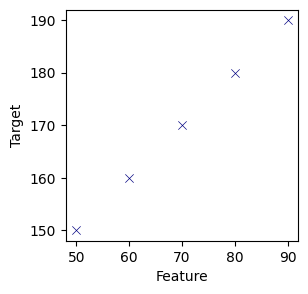

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = [[50, 150], [60, 160], [70, 170], [80, 180], [90, 190]]

d = np.array(data)

features = d[:, 0]
target = d[:, 1]

plt.figure(figsize=(3,3))
sns.scatterplot(x=features, y=target, marker="x", color="navy")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()


Data is organised in arrays or matrixes. It is the features of this data that we will use in order to perform some function that will either predict/classify our target labels or draw insight from our features.

The goal of the machine is to learn the best parameters of the function which aims to predict the target labels or the best parameters which minimizes the error (more on this further)



---

### Features and Targets

The features in our data are the values which we will use to predict/classify or draw insight from. For example, if we have some data on height and weight, our features may be height in order to predict weight. Or, we might use height and weight to further predict or classify on another target/label such as whether or not someone may be a good candidate for a clinical trial.



---

### Cost Function
**Specifically the squared error cost function**

Taking a F(X) function of Linear Regression
- F(X) = b + bX

Our goal is to find the parameters that will predict output labels (y) in order to do this we will have to find out how
far off we are from the target. This will be our **Cost** or our **Error**.

as we iterate through our array X(i) of features and plug them into our function using our current parameters we will output a predicted Y(i). We take this predicted Y(i) and subtract this from the actual value of Y(i) in the array.
- (predict - actual)

We then square this value to make sure that negative values can also contribute to the cost
- (predict - actual)^2

We then want to sum this error across the entire array, from i to m:
- Σᵢᵐ(predictⁱ - actualⁱ)^2
- M = number of training examples

With larger datasets, summing the error may produce a very large number, to avoid this a convention is to average by m
- 1/m Σᵢᵐ(predictⁱ - actualⁱ)^2

Another convention is to multiply the m by 2 when dividing, to make the output error slightly neater
- 1/(2/m) Σᵢᵐ(predictⁱ - actualⁱ)^2

Lastly a J(w,b) is added to denote our cost function

**Means Squared Error:**

**J(w,b) = 1/(2/m) Σᵢᵐ(predictⁱ - actualⁱ)^2**

Because the predict Y(i) is the output of our F(X) Function, we can re-write our cost function as follows:

**J(w,b) = 1/(2/m) * Σᵢᵐ(f(x(ⁱ)) - Y(ⁱ)^2**



The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

### Visualising Cost

[153 163 173 183 193]


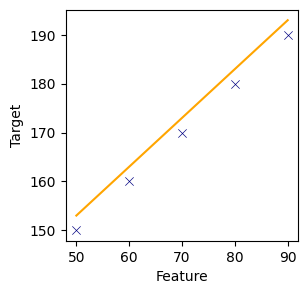

In [ ]:
# The parameters which the machine learns from
m = 1
b = 103

# The function used for the model
def f(x, m, b):
  return b + (m * x)

predict = f(features, m, b)
print(f(features, m, b))

plt.figure(figsize=(3,3))
sns.scatterplot(x=features, y=target, marker="x", color="navy")
plt.plot(features, predict, label="Regression Line", color="orange")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()



Initial Residuals: [3 3 3 3 3]
List of Cost Outputs: [225, 100, 25, 0, 25, 100, 225]


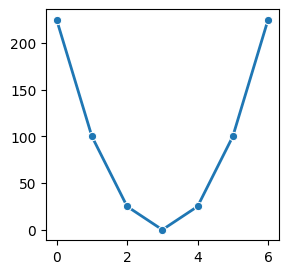

In [ ]:
residuals = predict - target

print(f"Initial Residuals: {residuals}")

def cost(target, predict):
    length = len(target)
    sum_of_squared_residuals = np.sum((predict - target)**2)
    return length * sum_of_squared_residuals


m = 1
b = 103
cost_list = []

for i in range(7):
  fx = f(features, m, b)
  cost_num = cost(target, fx)
  cost_list.append(cost_num)
  b -= 1


print(f"List of Cost Outputs: {cost_list}")

plt.figure(figsize=(3,3))
sns.lineplot(x=range(7), y=cost_list, linewidth=2, marker="o");




---

### Gradient Descent

**The learning part of machine learning.**

Instead of changing the values of our parameters by ourselves to lower the cost function output, we can use gradient descent to slowly reduce the cost function until we arrive at the best values for our parameters (or close enough)

For this, we will be using:

- Learning rate
- Epochs (Iterations)
- Derivatives

Gradient descent can be used for most functions and cost functions. For this example, we are using the cost function MSE (Means Squared Error) shortened to J(w,b)

**The job of gradient descent is to arrive at the best values for the cost function parameters (w,b) which minimizes J (the cost)**

When looking to minimize cost, gradient descent will look to what is the steepest descent. Meaning, if we are on top of a slope, what side of the slope do we go down in order to descend as quickly as possible (mathmetically this is calculated through derivates)

**Gradient Descent Formula**

$w = w - ∝ {d\over dw} J(w,b)$

This formula is saying:

- Take your current value of $w$ and adjust it a small amount $∝ {d\over dw} J(w,b)$
- In this instance, $=$ is acting as an assignment value: we are assigning $w$ to this new value

- $∝$ This is our learning rate
- ${d\over dw} J(w,b)$ is the derivative term of our cost function, this will tell us what direction to take our step and how big of a step will be taken (rate of change)

As we have multiple parameters (w,b) we will have to also calculate for b. This we do for all parameters until convergence.

**We want to do this simultaneously for both parameters**



---

**Gradient Descent In Action**

Using only one paramter (w)

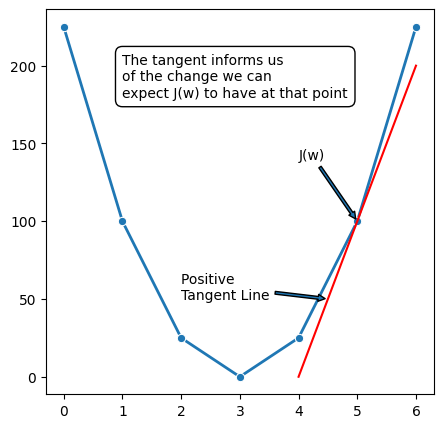

In [ ]:


plt.figure(figsize=(5,5))
sns.lineplot(x=range(7), y=cost_list, linewidth=2, marker="o")

# Point to draw the tangent line
x_point = 5
y_point = cost_list[x_point]

# Adjusted slope (manually)
slope_adjustment = 100

# Plot tangent line (manually adjusted slope)
plt.plot([x_point - 1, x_point + 1], [y_point - 1 * slope_adjustment, y_point + 1 * slope_adjustment], color='red', linestyle='-')

plt.annotate("J(w)", (5, 100), xytext=(4, 140), arrowprops=dict(arrowstyle="simple"))
plt.annotate("Positive \nTangent Line", (4.5, 50), xytext=(2, 50), arrowprops=dict(arrowstyle="simple"))

# Add a box around the annotation
plt.text(1, 180, "The tangent informs us \nof the change we can \nexpect J(w) to have at that point", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

When we calculate the derivate of w at some point using gradient descent, we are given either a positive or negative number which indicates the direction of the gradient. When the number is positive, we subtract w from the learning rate multiplied by this positive number which moves us left on the graph. If the number is negative (the tangent line facing down) w is subtracted from the negative number multiplied by the learning rate which moves us right on the graph.

From the derivative we also can see how drastic the change in w will be. The rate of change. This will dictate the size of the step we take, so it is very useful if we don't want to overshoot minimizing our cost.



---


### Learning Rate

The learning rate controls how quickly or slowly the machine learns or how big of a step gradient descent takes. The difficulty is in choosing the optimal learning rate. A learning rate to large will cause the cost function to overshoot the minimum (taking too huge of a step) when the learning is too small, then a lot of steps will need to be taken causing the machine to learn at too small of a rate.

**Local Minumum**

Gradient descent will work with a fixed learning rate to achieve a local minimum. It does this because as the derivative (tangent line) becomes less step, the rate of change (or the step taken at each iteration) becomes less and less as it approaches the local minimum.



---

### Calculating Derivative

The derivative of the cost function $J(w,b)$ using a Linear Regression function as follows:

**W:**

${α \over αw} J(w,b) = {1\over m} \sum\limits_{i = 1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})x{(i)}$

**B:**

${α \over αw} J(w,b) = {1\over m} \sum\limits_{i = 1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})$

Here we take the orginal means squared error (MSE) cost function used on the linear function $f(x) = mx + b$ and we calculate the derivative of the cost function.

In [ ]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
import math, copy

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing